In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import Angle
from astropy.coordinates.angle_utilities import angular_separation
import astropy.units as u

%matplotlib inline

In [7]:
protons = pd.read_hdf('../build/proton_test.h5', 'array_events')

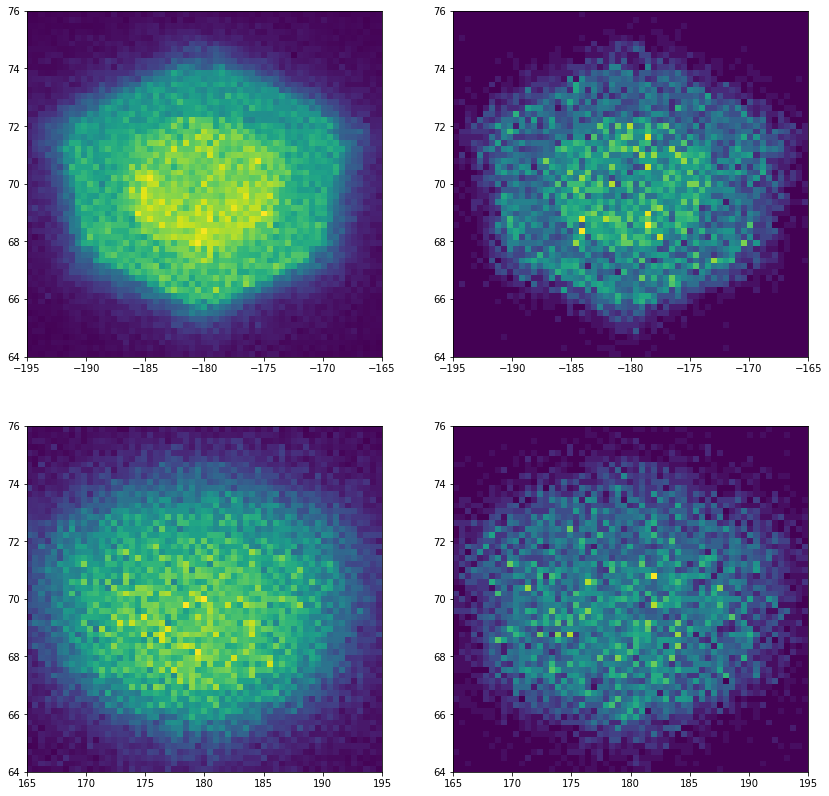

In [39]:
threshold = 0.7
protons_selected = protons.query(f'gamma_prediction_mean > {threshold}')

f, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(14, 14))

ax1.hist2d(protons.az, protons.alt,  bins=[np.linspace(-195, -165, 60), np.linspace(64, 76, 60)])
ax2.hist2d(protons_selected.az, protons_selected.alt,  bins=[np.linspace(-195, -165, 60), np.linspace(64, 76, 60)])

ax3.hist2d(protons.mc_az, protons.mc_alt,  bins=[np.linspace(165, 195, 60), np.linspace(64, 76, 60)])
ax4.hist2d(protons_selected.mc_az, protons_selected.mc_alt,  bins=[np.linspace(165, 195, 60), np.linspace(64, 76, 60)])

None

In [59]:
def calculate_distance_to_true_source_position(df):
    source_az = Angle(df.mc_az.values * u.deg).wrap_at(180 * u.deg)
    source_alt = Angle(df.mc_alt.values * u.deg)

    az = Angle(df.az.values*u.deg).wrap_at(180 * u.deg)
    alt = Angle(df.alt.values*u.deg)

    distance = angular_separation(source_az, source_alt, az, alt).to(u.deg)
    return distance


def calculate_distance_to_point_source(df, source_alt, source_az):
    source_az = Angle(source_az).wrap_at(180 * u.deg)
    source_alt = Angle(source_alt)

    az = Angle(df.az.values*u.deg).wrap_at(180 * u.deg)
    alt = Angle(df.alt.values*u.deg)

    distance = angular_separation(source_az, source_alt, az, alt).to(u.deg)
    return distance

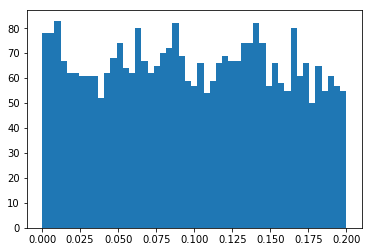

In [66]:
protons['theta'] = calculate_distance_to_point_source(protons, source_alt=70*u.deg, source_az=180 *u.deg)
plt.hist(protons.theta**2, bins=np.linspace(0, 0.2, 50))
None

## Compare to FACT data. For fun and profit

In [57]:
import fact.io

fact_protons = fact.io.read_data('../../open_crab_sample_analysis/build/proton_test_dl3.hdf5', key='events')

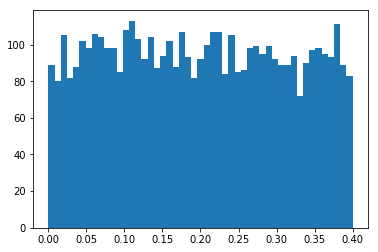

In [58]:
plt.hist(fact_protons.theta_deg**2, bins=np.linspace(0, 0.4, 50))
None